In [2]:
import matplotlib.pyplot as plt
import sklearn 
import pandas as pd


In [10]:
data= pd.read_csv("k-nearestneigh/Classified Data k neigh.txt")

In [11]:
data.head(5)

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [12]:
data.tail(5)


,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
995,995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1
999,999,0.837460,0.961184,0.417006,0.799784,0.934399,0.424762,0.778234,0.907962,1.257190,1.364837,1


In [13]:
data.shape

(1000, 12)

In [14]:
data.head(4)

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1


In [15]:
pseudo_data=pd.read_csv("k-nearestneigh/Classified Data k neigh.txt", index_col=0)

In [16]:
pseudo_data.head(5)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [18]:
pseudo_data.shape

(1000, 11)

In [19]:
# now we will be applying featurescale, most probably standard scalar

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()

In [23]:
scaler.fit(data.drop("TARGET CLASS", axis=1))

StandardScaler()

In [25]:
scaled=scaler.transform(data.drop("TARGET CLASS", axis=1))

In [27]:
datahead=pd.DataFrame(scaled, columns=data.columns[:-1])

In [28]:
datahead

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...,...
995,1.716463,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,1.719927,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,1.723391,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,1.726856,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [29]:
from sklearn.model_selection import train_test_split


In [30]:
x_train, x_test, y_train, y_test=train_test_split(scaled, data["TARGET CLASS"], test_size=0.30)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn=KNeighborsClassifier(n_neighbors=1)

In [42]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [50]:
predict=knn.predict(x_test)

In [56]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score


In [51]:
confuse=confusion_matrix(predict, y_test)

In [52]:
confuse

array([[140,  12],
       [ 12, 136]], dtype=int64)

In [54]:
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       152
           1       0.92      0.92      0.92       148

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [57]:
accuracy=accuracy_score(predict, y_test)
print(accuracy*100)

92.0


# we can clearly see that the accuracy score is not really satisfactory




In [59]:
# now we will be changing the vcalues to k so as to reach a point that would give us with the maximum accuracy.
import numpy as np

In [72]:
error_rate=[]
for i in range(1,30):
    knn_1=KNeighborsClassifier(n_neighbors=i)
    knn_1.fit(x_train,y_train)
    pred_i=knn_1.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))

In [63]:
#plotting

[]

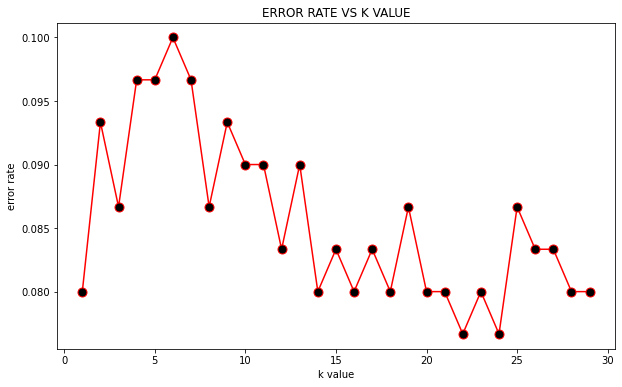

In [73]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate,'r-o', markerfacecolor="black", markersize=9)
plt.title("ERROR RATE VS K VALUE")
plt.ylabel("error rate")
plt.xlabel("k value")
plt.plot()

In [ ]:
#okay so we found out that the new valule of k where the prediction must be strong is around 22, 23 

In [83]:
new_knn=KNeighborsClassifier(n_neighbors=22)
new_knn.fit(x_train, y_train)
new_pred=new_knn.predict(x_test)
confusion=confusion_matrix(new_pred, y_test)
accuracy=accuracy_score(new_pred, y_test)
print(confusion, accuracy)
print(classification_report(new_pred, y_test))

[[141  12]
 [ 11 136]] 0.9233333333333333
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       153
           1       0.92      0.93      0.92       147

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

